In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn


In [2]:
seed = 1234
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

In [3]:
from utils.openpose_net import OpenPoseNet

net = OpenPoseNet()
net

OpenPoseNet(
  (model0): OpenPose_Feature(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): Conv2d(256, 256, ker

In [4]:
#net_weights = torch.load('./weights/pose_model_scratch.pth', map_location={'cuda:0': 'cpu'})
net_weights = torch.load('./weights/pose_model_scratch.pth')
keys = list(net_weights.keys())

weights_load = {}

for i in range(len(keys)):
    weights_load[list(net.state_dict().keys())[i]] = net_weights[list(keys)[i]]
    
state = net.state_dict()
state.update(weights_load)
net.load_state_dict(state)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [5]:
net

OpenPoseNet(
  (model0): OpenPose_Feature(
    (model): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): Conv2d(256, 256, ker

In [6]:
net_weights.keys()

odict_keys(['module.model0.0.weight', 'module.model0.0.bias', 'module.model0.2.weight', 'module.model0.2.bias', 'module.model0.5.weight', 'module.model0.5.bias', 'module.model0.7.weight', 'module.model0.7.bias', 'module.model0.10.weight', 'module.model0.10.bias', 'module.model0.12.weight', 'module.model0.12.bias', 'module.model0.14.weight', 'module.model0.14.bias', 'module.model0.16.weight', 'module.model0.16.bias', 'module.model0.19.weight', 'module.model0.19.bias', 'module.model0.21.weight', 'module.model0.21.bias', 'module.model0.23.weight', 'module.model0.23.bias', 'module.model0.25.weight', 'module.model0.25.bias', 'module.model1_1.0.weight', 'module.model1_1.0.bias', 'module.model1_1.2.weight', 'module.model1_1.2.bias', 'module.model1_1.4.weight', 'module.model1_1.4.bias', 'module.model1_1.6.weight', 'module.model1_1.6.bias', 'module.model1_1.8.weight', 'module.model1_1.8.bias', 'module.model2_1.0.weight', 'module.model2_1.0.bias', 'module.model2_1.2.weight', 'module.model2_1.2.b

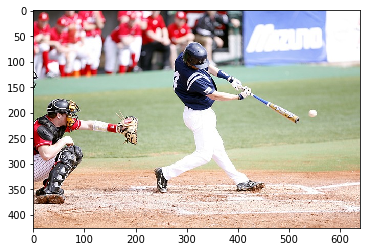

In [7]:
test_image = './data/hit-1407826_640.jpg'
oriImg = cv2.imread(test_image)

oriImg = cv2.cvtColor(oriImg, cv2.COLOR_BGR2RGB)
plt.imshow(oriImg)
plt.show()

size = (368, 368)
img = cv2.resize(oriImg, size, interpolation=cv2.INTER_CUBIC)

img = img.astype(np.float32) / 255.

color_mean = [0.485, 0.456, 0.406]
color_std = [0.229, 0.224, 0.225]

preprocessed_img = img.copy()[:, :, ::-1] # BGR -> RGB

for i in range(3):
    preprocessed_img[:, :, i] = preprocessed_img[:, :, i] - color_mean[i]
    preprocessed_img[:, :, i] = preprocessed_img[:, :, i] / color_std[i]
    
img = preprocessed_img.transpose((2, 0, 1)).astype(np.float32)

img = torch.from_numpy(img)

x = img.unsqueeze(0)

In [8]:
x.shape

torch.Size([1, 3, 368, 368])

In [ ]:
#net.eval()
predicted_outputs, _ = net(x) # ここでprocessが落ちる
pafs = predicted_outpus[0][0].detach().numpy().transpose(1, 2, 0)
heatmaps = predicted_outputs[1][0].detach().numpy().transpose(1, 2, 0)

pafs = cv2.resize(pafs, size, interpolation=cv2.INTER_CUBIC)
heatmaps = cv2.resize(heatmaps, size, interpolation=cv2.INTER_CUBIC)

pafs = cv2.resize(pafs, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)
heatmaps = cv2.resize(heatmaps, (oriImg.shape[1], oriImg.shape[0]), interpolation=cv2.INTER_CUBIC)